In [10]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical


In [11]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

y_cat_train = to_categorical(y_train,10)
y_cat_test = to_categorical(y_test,10)

In [12]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [13]:
import tensorflow.keras as keras
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.applications import VGG16

In [14]:

model = keras.Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(28, 28, 1), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2), padding="same"))
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(28, 28, 1), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2), padding="same"))
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(28, 28, 1), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2), padding="same"))
# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 128 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(128, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']) # we can add in additional metrics
"""
model = VGG16(
    include_top=False,
    weights="imagenet",
    input_shape=(28, 28, 3)
)
"""
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [15]:
from tensorflow.keras.callbacks import EarlyStopping

In [16]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 32)          16416     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 32)                0

In [18]:
model.fit(x_train,y_cat_train,epochs=1000,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/1000
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3026 - accuracy: 0.1084 - val_loss: 2.3015 - val_accuracy: 0.1135
Epoch 2/1000
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3020 - accuracy: 0.1117 - val_loss: 2.3015 - val_accuracy: 0.1135
Epoch 3/1000
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3018 - accuracy: 0.1121 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 4/1000
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3015 - accuracy: 0.1119 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 5/1000
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3015 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 6/1000
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 7/1000
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3012 -

In [19]:
losses = pd.DataFrame(model.history.history)


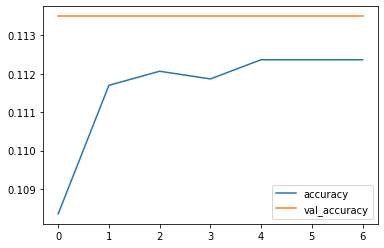

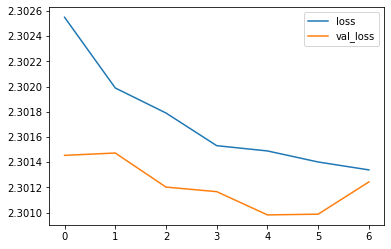

In [20]:
losses[['accuracy','val_accuracy']].plot()
losses[['loss','val_loss']].plot()

In [21]:
from sklearn.metrics import classification_report,confusion_matrix

In [22]:
predictions = np.argmax(model.predict(x_test), axis=-1)

In [35]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       980
           1       0.11      1.00      0.20      1135
           2       0.00      0.00      0.00      1032
           3       0.00      0.00      0.00      1010
           4       0.00      0.00      0.00       982
           5       0.00      0.00      0.00       892
           6       0.00      0.00      0.00       958
           7       0.00      0.00      0.00      1028
           8       0.00      0.00      0.00       974
           9       0.00      0.00      0.00      1009

    accuracy                           0.11     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.11      0.02     10000



In [24]:
confusion_matrix(y_test,predictions)

array([[   0,  980,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 1135,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 1032,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 1010,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,  982,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,  892,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,  958,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 1028,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,  974,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 1009,    0,    0,    0,    0,    0,    0,    0,    0]],
      dtype=int64)